In [116]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


In [117]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [118]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [119]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [120]:
df.shape
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [121]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [122]:
# Fix the TotalCharges Column
# convert to categorical to numerical
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = "coerce")
print(df["TotalCharges"].dtype)


float64


In [123]:
# Convert the Churn Column to Binary
df["Churn"] = df["Churn"].map({"Yes": 1, "No" : 0})

**Data Visulisation**
At first to understand dataset and the relationship we need to do data visulisation

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [127]:
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


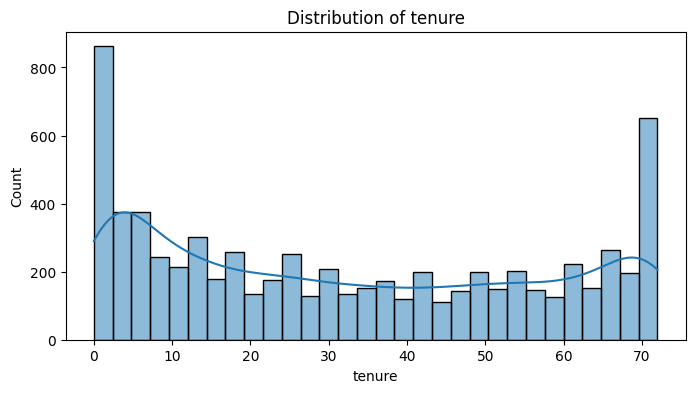

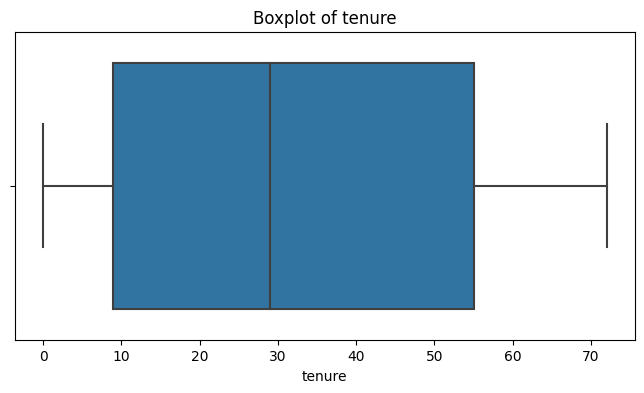

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


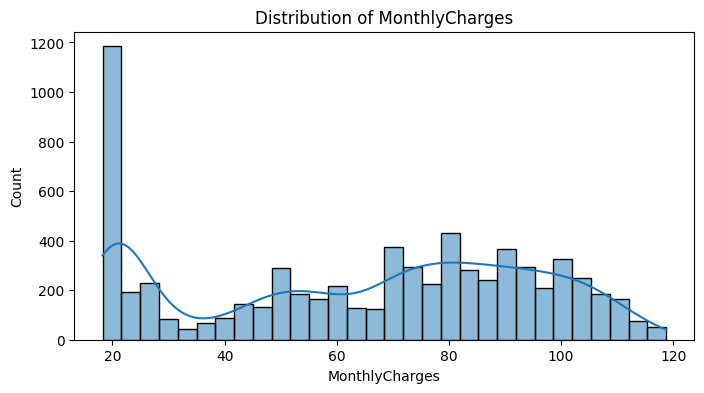

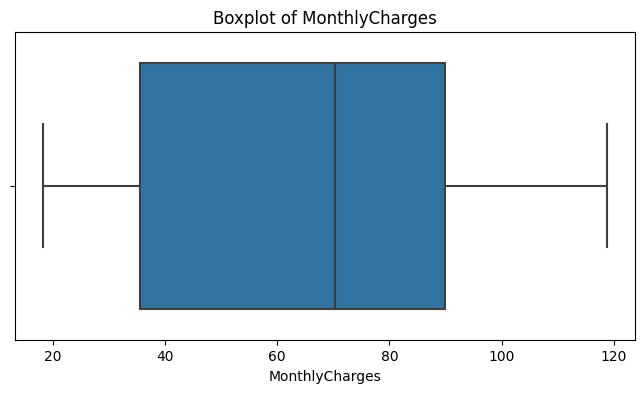

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


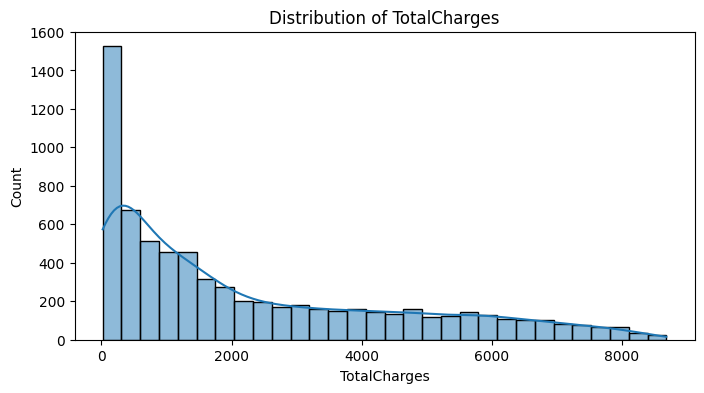

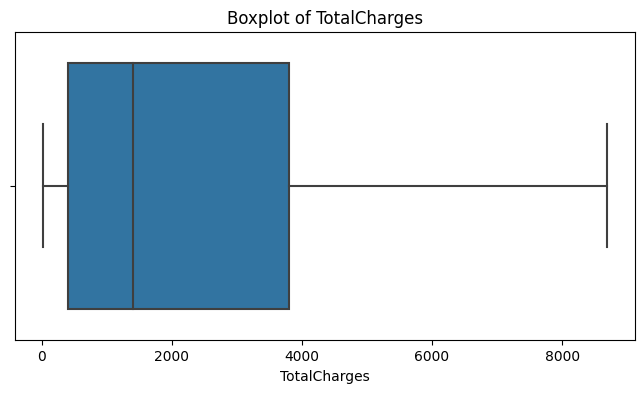

In [128]:
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

**Learning from the visuliation**
1. **tenure (Time a customer has stayed)**
Visualization:
 *Histogram:* The distribution is Bimodal (has two distinct peaks).
Peak 1 (New Customers): There is a massive spike at 0−5 months. This indicates a large influx of new customers, or possibly high churn (people leaving immediately).
Peak 2 (Loyal Customers): There is another spike at 70+ months. This represents a solid base of loyal, long-term customers.
*Boxplot:*
The Median is roughly 29 months.
There are no outliers. The data spans the full range from 0 to 72 clearly.
Key Learning: This is a "U-shaped" distribution. You have two main groups: people who just joined (or are testing the service) and people who have been there forever. The "danger zone" for losing a customer is likely in the first 6–12 months.

2.** MonthlyCharges (How much they pay per month)**
Visualization:
 Histogram: The distribution is somewhat chaotic but clearly not a Bell Curve (Normal Distribution).
The Spike at 20: There is a huge spike at the lowest price point (~20). This suggests a "Basic" or "Entry-level" plan that is very popular.
The Hump at 70–110: There is a broad distribution of customers paying higher amounts. This suggests users who subscribe to "Premium" services (like Fiber optic, streaming, device protection, etc.).
Boxplot:
The Median is roughly 70.
The box is wide, meaning there is high variance in what people pay.
Key Learning: Your customers are segmented by price. You have a "Budget" group and a "High Value" group. There are very few people paying between 30 and 40, suggesting a gap in product pricing tiers.

3. **TotalCharges (Lifetime value of the customer)**

Visualization:
 Histogram: This is a Right-Skewed (Positively Skewed) distribution.
The majority of values are clustered on the left (low total charges).
The "tail" extends far to the right.
Boxplot:
The median is quite low (around 1400) compared to the max value (~$8000+).
The whisker on the right is very long, confirming the skew.
Key Learning: This skew is expected. TotalCharges is roughly calculated as tenure × MonthlyCharges. Since you have so many new customers (low tenure), you naturally have many customers with low Total Charges. Only the long-term, high-paying customers make up the long tail on the right.



In [129]:
categorical_cols = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
                    "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                    "TechSupport", "StreamingTV", "StreamingMovies", "Contract",
                    "PaperlessBilling", "PaymentMethod"]


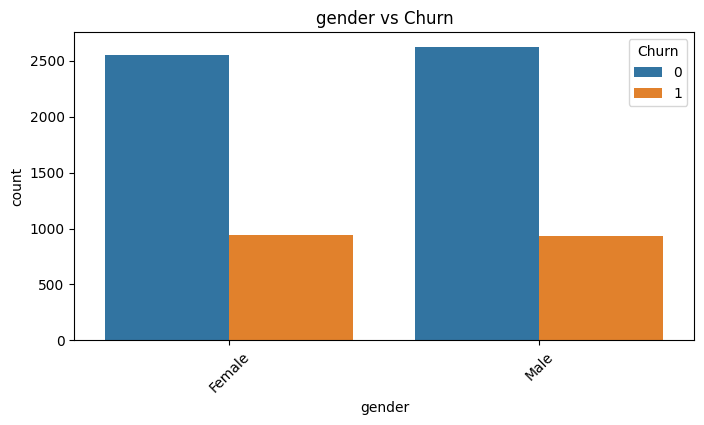

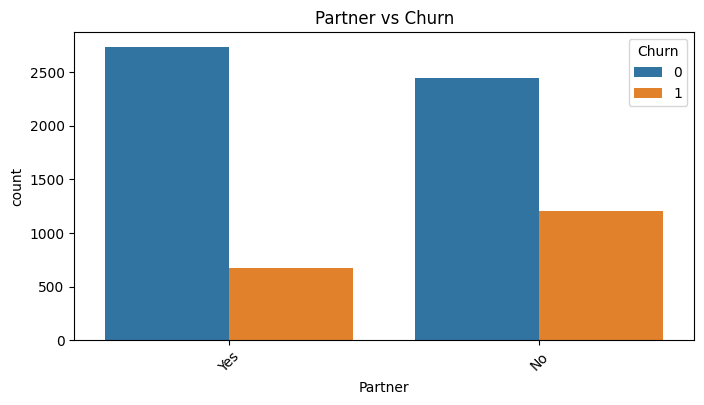

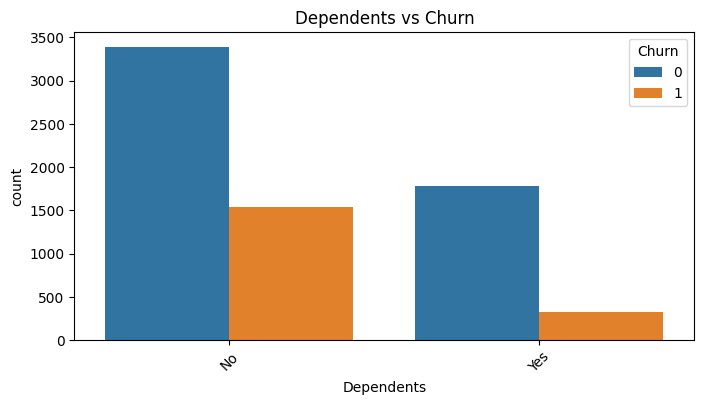

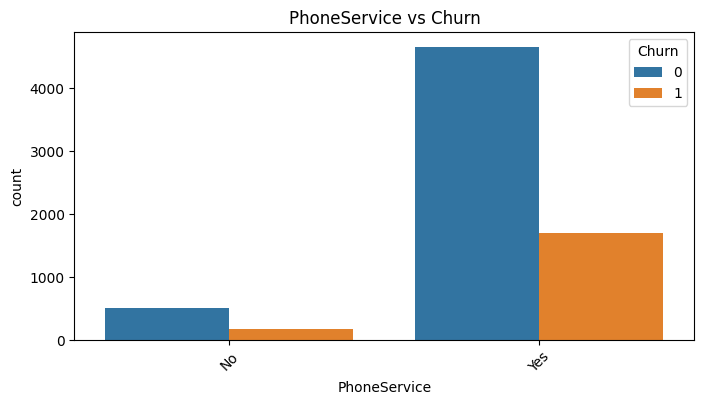

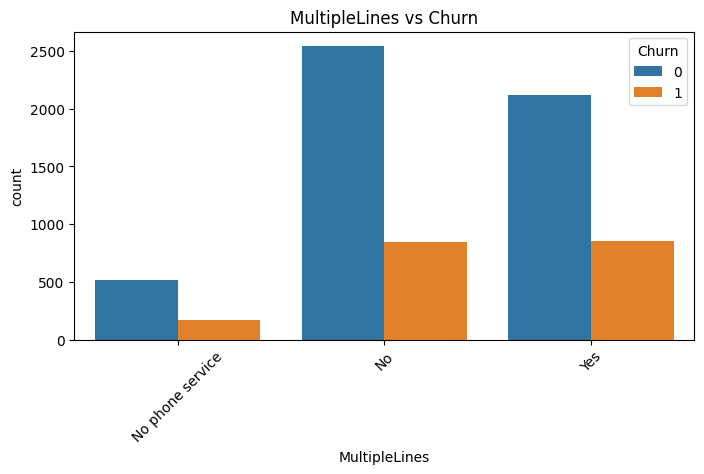

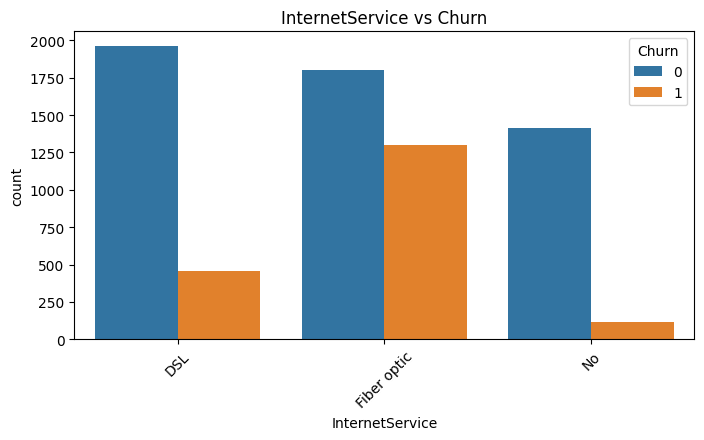

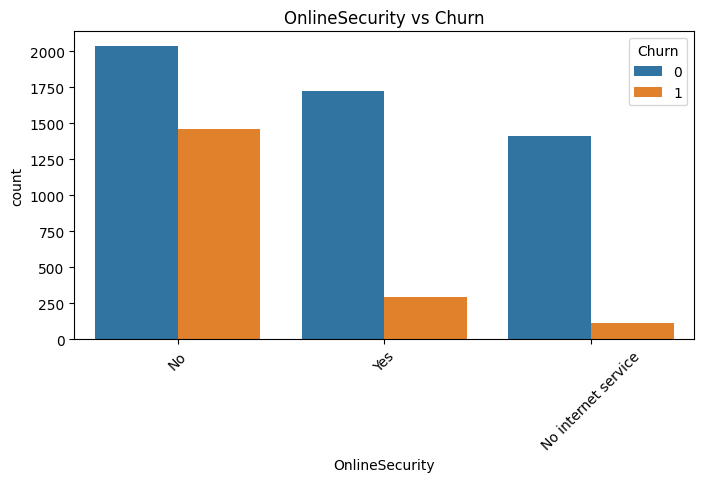

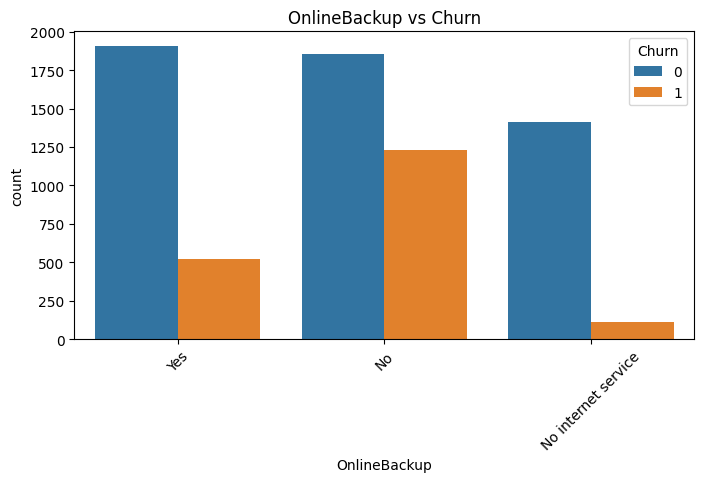

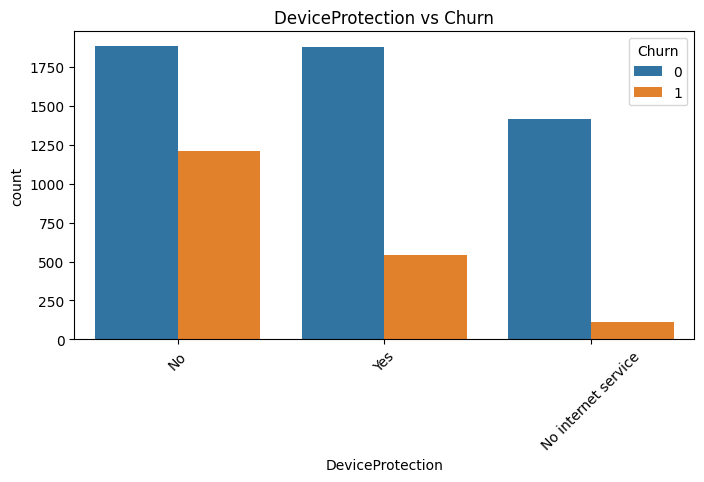

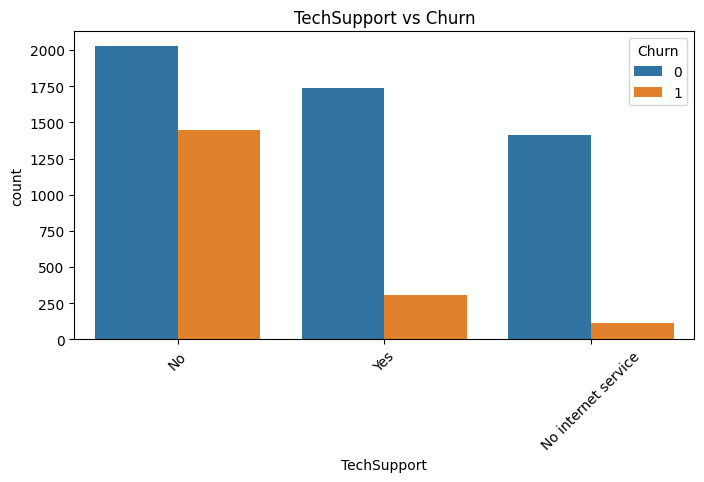

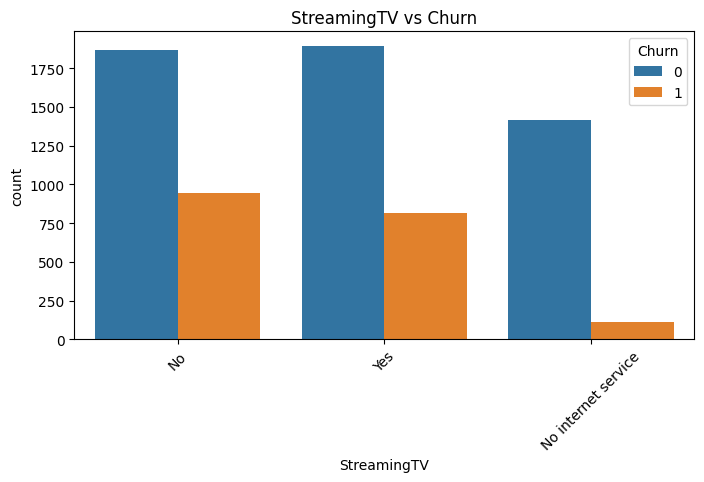

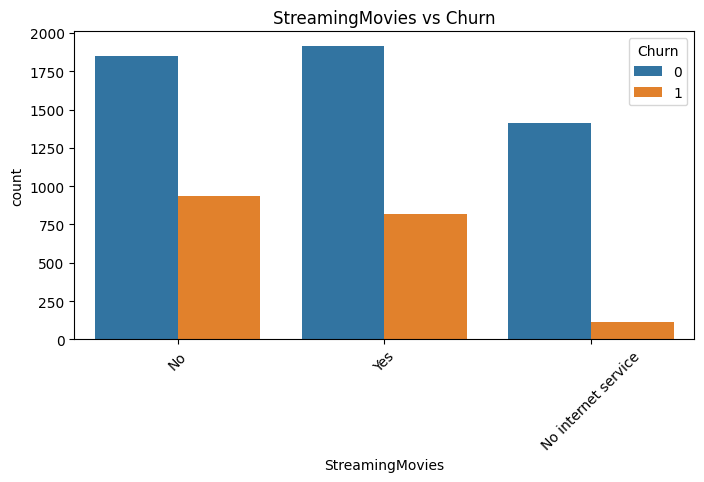

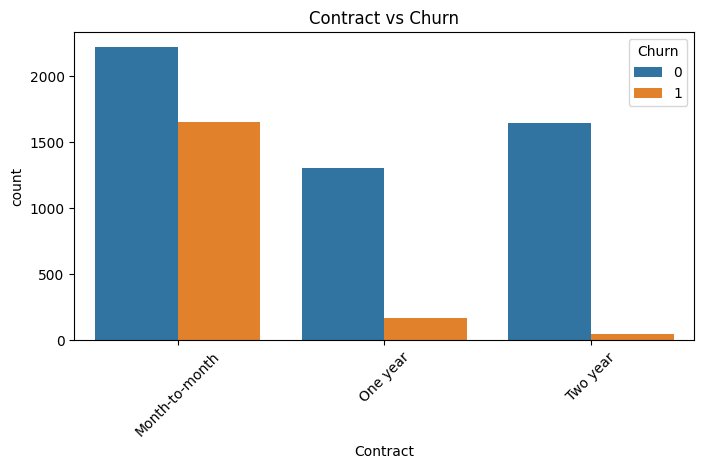

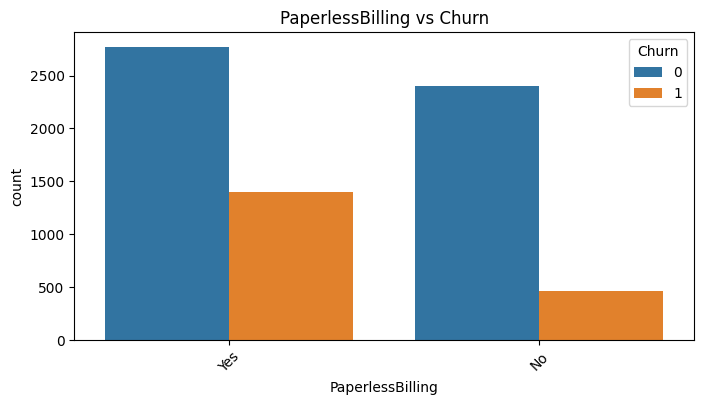

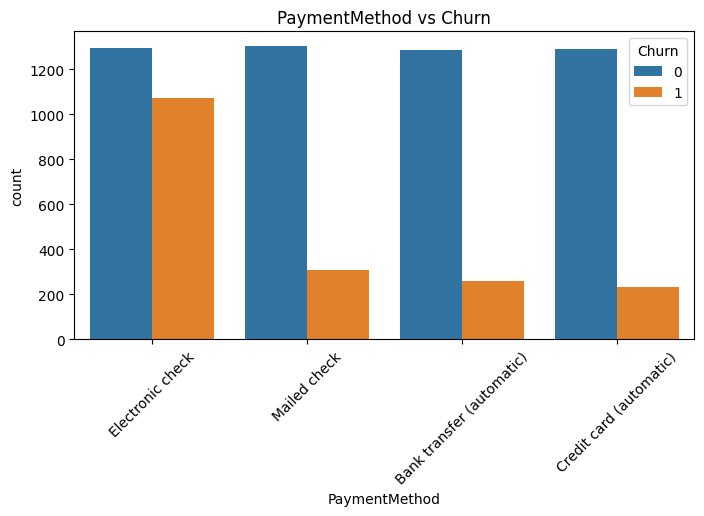

In [130]:
# ---- 3.4 Churn vs Categorical Features ----
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"{col} vs Churn")
    plt.xticks(rotation=45)
    plt.show()

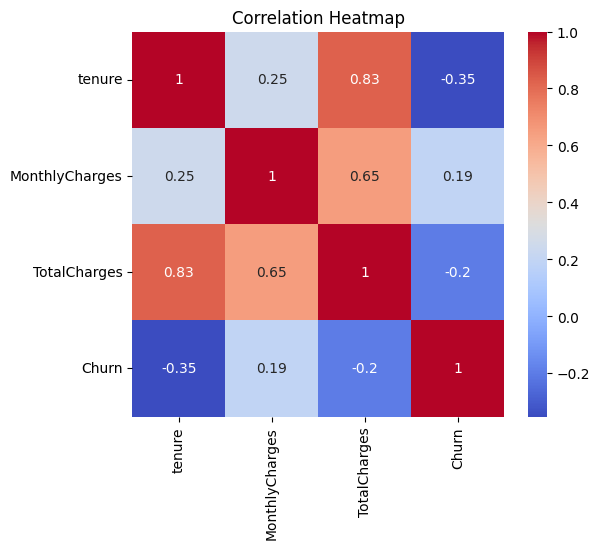

In [131]:
# ---- 3.5 Correlation Heatmap ----
plt.figure(figsize=(6,5))
sns.heatmap(df[numerical_cols + ["Churn"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [132]:
# 4.1 Tenure Buckets
df["TenureBucket"] = pd.cut(df["tenure"],
                            bins=[0,12,24,48,60,72],
                            labels=["0-12","12-24","24-48","48-60","60-72"])


In [133]:
# 4.2 MonthlyCharges Buckets
df["MonthlyChargesBucket"] = pd.qcut(df["MonthlyCharges"], q=4, labels=["Low","Medium","High","Very High"])

In [134]:
# 4.3 Services Count
service_cols = ["PhoneService","MultipleLines","OnlineSecurity","OnlineBackup",
                "DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
df["ActiveServices"] = df[service_cols].apply(lambda x: sum(x=="Yes"), axis=1)


In [135]:
# 4.4 Contract Type Numeric Encoding
contract_mapping = {"Month-to-month":0, "One year":1, "Two year":2}
df["ContractType"] = df["Contract"].map(contract_mapping)


In [136]:
# 4.5 Payment Method Numeric Encoding
payment_mapping = {"Electronic check":0, "Mailed check":1, "Bank transfer (automatic)":2, "Credit card (automatic)":3}
df["PaymentMethodType"] = df["PaymentMethod"].map(payment_mapping)


In [137]:
df["CLV"] = (df["MonthlyCharges"] * (df["tenure"] + 3)) - (df["SeniorCitizen"]*10)


In [138]:
# Drop unnecessary columns for modeling
df_model = df.drop(["customerID"], axis=1)

In [139]:
# Save cleaned dataset to CSV
df_model.to_csv("Telco_Cleaned_Featured.csv", index=False)

In [140]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   gender                7043 non-null   object  
 1   SeniorCitizen         7043 non-null   int64   
 2   Partner               7043 non-null   object  
 3   Dependents            7043 non-null   object  
 4   tenure                7043 non-null   int64   
 5   PhoneService          7043 non-null   object  
 6   MultipleLines         7043 non-null   object  
 7   InternetService       7043 non-null   object  
 8   OnlineSecurity        7043 non-null   object  
 9   OnlineBackup          7043 non-null   object  
 10  DeviceProtection      7043 non-null   object  
 11  TechSupport           7043 non-null   object  
 12  StreamingTV           7043 non-null   object  
 13  StreamingMovies       7043 non-null   object  
 14  Contract              7043 non-null   object  
 15  Pape

**Traing Start**

In [141]:
# For preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import seaborn as sns

In [142]:
# Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix


In [143]:
# Split Dataset into Features and Targets
#regression target CLV
X_reg = df.drop(["CLV", "Churn"], axis=1)
y_reg = df["CLV"]

In [144]:
# classification
# Classification target: Churn
X_clf = df.drop(["CLV", "Churn"], axis=1)
y_clf = df["Churn"]

In [145]:
categorical_features = ["gender", "Partner", "Dependents", "PhoneService", "MultipleLines",
                        "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                        "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", 
                        "TenureBucket", "MonthlyChargesBucket"]

numerical_features = ["SeniorCitizen", "tenure", "MonthlyCharges", "TotalCharges", "ActiveServices", "ContractType", "PaymentMethodType"]


In [146]:
# Regression
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Classification
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


In [147]:
# Build Preprocessing Pipeline

In [148]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [149]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

reg_preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imputer", SimpleImputer(strategy="mean")),
            ("scaler", StandardScaler())
        ]), numerical_features),

        ("cat", Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(drop="first", sparse=False))
        ]), categorical_features)
    ]
)


In [150]:
# classification preprocessor
clf_preprocessor = ColumnTransformer(
    transformers = [
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(drop="first", sparse=False),categorical_features)
    ]
)

In [151]:
# StandardScaler → scales numerical features
# OneHotEncoder → converts categorical variables to binary columns
# Drop="first" → avoids dummy variable trap

In [152]:
corr_matrix = df[numerical_features].corr()
corr_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ActiveServices,ContractType,PaymentMethodType
SeniorCitizen,1.000000,0.016567,0.220173,0.102411,0.095946,-0.142554,-0.093704
tenure,0.016567,1.000000,0.247900,0.825880,0.523600,0.671607,0.340305
MonthlyCharges,0.220173,0.247900,1.000000,0.651065,0.802322,-0.074195,-0.074353
TotalCharges,0.102411,0.825880,0.651065,1.000000,0.796885,0.450306,0.222694
ActiveServices,0.095946,0.523600,0.802322,0.796885,1.000000,0.280681,0.124332
ContractType,-0.142554,0.671607,-0.074195,0.450306,0.280681,1.000000,0.358913
PaymentMethodType,-0.093704,0.340305,-0.074353,0.222694,0.124332,0.358913,1.000000


In [153]:
# regression pipelines
#there are many features so linear regression will give the unbalanced coefficient so do the ridge ,
# so for that reason here elasticnet is the best possible solution
from sklearn.linear_model import ElasticNet

reg_pipeline = Pipeline([
    ("preprocessor", reg_preprocessor),
    ("regressor", ElasticNet(max_iter=5000))
])


In [154]:
elastic_params = {
    "regressor__alpha": [0.01, 0.1, 1, 10],
    "regressor__l1_ratio": [0.2, 0.5, 0.7, 0.9]
}

elastic_grid = GridSearchCV(
    reg_pipeline,
    elastic_params,
    cv=5,
    scoring="r2",
    n_jobs=-1
)

elastic_grid.fit(X_reg_train, y_reg_train)

print("Best Params:", elastic_grid.best_params_)
print("Best CV Score:", elastic_grid.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

Best Params: {'regressor__alpha': 0.01, 'regressor__l1_ratio': 0.9}
Best CV Score: 0.9975165464883284


In [155]:
y_pred = elastic_grid.predict(X_reg_test)

from sklearn.metrics import r2_score, mean_squared_error

print("Test R2:", r2_score(y_reg_test, y_pred))
print("Test RMSE:", mean_squared_error(y_reg_test, y_pred, squared=False))


Test R2: 0.9983911606327805
Test RMSE: 93.84069826423976


In [156]:
best_model = elastic_grid.best_estimator_.named_steps["regressor"]
best_model.coef_


array([-5.24412289e+00,  9.29582970e+01,  8.72611896e+01,  2.15720043e+03,
        2.43552103e+01, -2.02689878e+01,  2.09090011e+00, -1.21062524e+00,
       -4.08488631e+00, -9.93034224e+00,  2.28656806e+01, -2.26982733e+01,
       -1.15018806e+01,  3.09561759e+01, -1.43527371e+01, -1.41216148e+01,
       -1.47063930e+00, -1.20920722e+01,  4.62475799e+00, -9.62378511e+00,
        0.00000000e+00, -8.17609705e+00,  4.60637064e+00, -8.67622427e+00,
        6.12564112e+00, -1.11190308e+01,  6.69258137e+00, -1.10558252e+00,
       -2.50660836e+00, -1.12031593e+01, -1.86335597e+01, -7.60247927e+00,
        4.65938946e+01, -7.28791002e-01,  1.48438778e+01])

In [161]:
y_clf_train.isna().sum()

0

In [157]:
y_clf_train.isna().sum()
df["Churn"].value_counts(dropna=False)
df["Churn"].value_counts(dropna=False)


Churn
0    5174
1    1869
Name: count, dtype: int64

In [158]:
df["Churn"].value_counts(dropna=False)


Churn
0    5174
1    1869
Name: count, dtype: int64

In [162]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# For numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Fill NaNs with median
    ('scaler', StandardScaler())
])

# For categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill NaNs with mode
    ('onehot', OneHotEncoder(drop='first', sparse=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Update pipeline with LogisticRegression
clf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])


In [164]:
# classification 
# Hyperparameters
clf_params = {
    "classifier__C": [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    "classifier__penalty": ["l1", "l2"],
    "classifier__solver": ["liblinear"]  # solver compatible with l1
}




In [165]:
clf_grid = GridSearchCV(clf_pipeline, clf_params, cv=5, scoring="roc_auc")
clf_grid.fit(X_clf_train, y_clf_train)



/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_outp

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['SeniorCitizen',
                                                                          'tenure',
                                                                          'MonthlyCharges',
                                                                          'TotalCharges',
                                                                          'ActiveServices',
                                                                          'ContractType',
                                                                          'PaymentMethodType']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(...
                                                                          'InternetService',
                                                                          'OnlineSecurity',
                                                                          'OnlineBackup',
                                                                          'DeviceProtection',
                                                                          'TechSupport',
                                                                          'StreamingTV',
                                                                          'StreamingMovies',
                                                                          'PaperlessBilling',
                                                                          'TenureBucket',
                                                                          'MonthlyChargesBucket'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='roc_auc')

In [166]:
print("Best Classifier Parameters:", clf_grid.best_params_)
print("Best CV ROC-AUC Score:", clf_grid.best_score_)

# Evaluate on Test Set
y_clf_pred = clf_grid.predict(X_clf_test)
y_clf_prob = clf_grid.predict_proba(X_clf_test)[:,1]

print("Test Accuracy:", accuracy_score(y_clf_test, y_clf_pred))
print("Test ROC-AUC:", roc_auc_score(y_clf_test, y_clf_prob))
print(classification_report(y_clf_test, y_clf_pred))

Best Classifier Parameters: {'classifier__C': 100, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Best CV ROC-AUC Score: 0.8413180746207652
Test Accuracy: 0.8140525195173882
Test ROC-AUC: 0.8593877772832197
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1036
           1       0.68      0.57      0.62       373

    accuracy                           0.81      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [167]:
# Get Churn Probabilities (we want the probability of class 1)
churn_probs = clf_grid.predict_proba(X_clf_test)[:, 1]

In [168]:
# Get Predicted CLV
clv_preds = elastic_grid.predict(X_reg_test)

In [169]:
# 2. Create a Strategy DataFrame
strategy_df = pd.DataFrame({
    'Actual_Churn': y_clf_test,
    'Churn_Probability': churn_probs,
    'Predicted_CLV': clv_preds
})

In [170]:
# 3. Calculate Expected Loss
strategy_df['Expected_Loss'] = strategy_df['Churn_Probability'] * strategy_df['Predicted_CLV']

In [171]:
# 4. Define Segments based on median/quantiles
avg_clv = strategy_df['Predicted_CLV'].median()
avg_prob = strategy_df['Churn_Probability'].median()

In [172]:
def assign_segment(row):
    if row['Predicted_CLV'] > avg_clv and row['Churn_Probability'] > avg_prob:
        return 'VIP at Risk (Action: High Priority)'
    elif row['Predicted_CLV'] > avg_clv and row['Churn_Probability'] <= avg_prob:
        return 'Loyalist (Action: Upsell)'
    elif row['Predicted_CLV'] <= avg_clv and row['Churn_Probability'] > avg_prob:
        return 'Low Value Risk (Action: Low Priority/Ignore)'
    else:
        return 'Standard Customer (Action: Maintain)'

strategy_df['Segment'] = strategy_df.apply(assign_segment, axis=1)

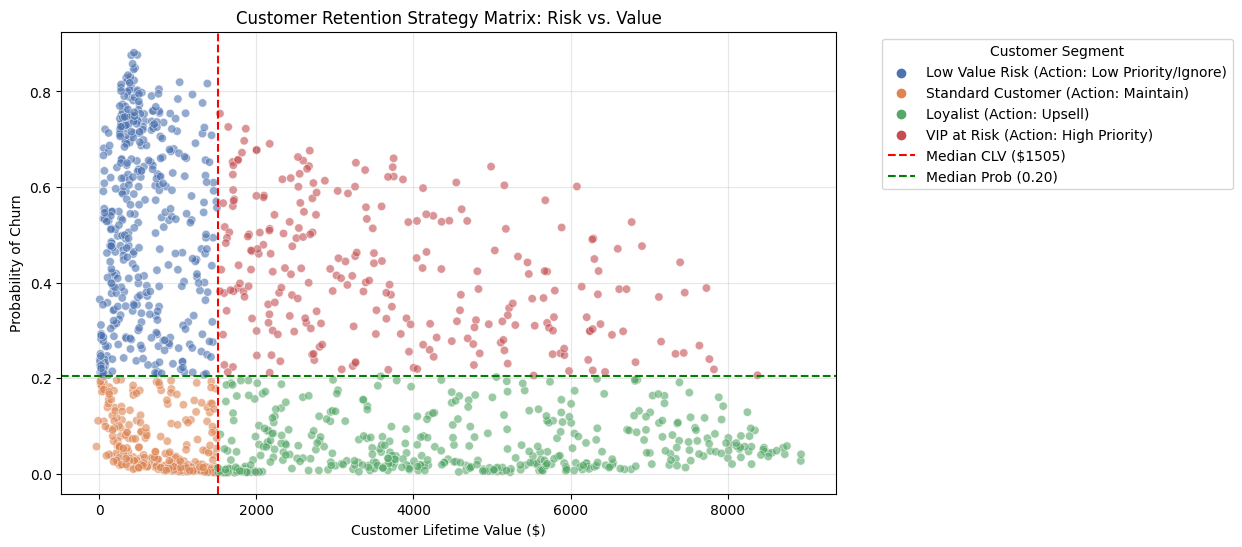

Top 5 Customers to Target (Highest Expected Revenue Loss):
      Actual_Churn  Churn_Probability  Predicted_CLV  Expected_Loss  \
4074             1           0.601189    6081.377294    3656.054236   
7023             0           0.526744    6779.169270    3570.886573   
339              1           0.476534    6909.872720    3292.792604   
2879             1           0.442661    7396.563051    3274.169192   
6497             0           0.572368    5678.655763    3250.281653   

                                  Segment  
4074  VIP at Risk (Action: High Priority)  
7023  VIP at Risk (Action: High Priority)  
339   VIP at Risk (Action: High Priority)  
2879  VIP at Risk (Action: High Priority)  
6497  VIP at Risk (Action: High Priority)  


In [173]:
# 5. Visualize the Segments
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=strategy_df, 
    x='Predicted_CLV', 
    y='Churn_Probability', 
    hue='Segment',
    alpha=0.6,
    palette='deep'
)
plt.axvline(x=avg_clv, color='red', linestyle='--', label=f'Median CLV (${avg_clv:.0f})')
plt.axhline(y=avg_prob, color='green', linestyle='--', label=f'Median Prob ({avg_prob:.2f})')
plt.title('Customer Retention Strategy Matrix: Risk vs. Value')
plt.xlabel('Customer Lifetime Value ($)')
plt.ylabel('Probability of Churn')
plt.legend(title='Customer Segment', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.show()



In [174]:
# 6. Show the "Priority List"
print("Top 5 Customers to Target (Highest Expected Revenue Loss):")
print(strategy_df.sort_values(by='Expected_Loss', ascending=False).head())

Top 5 Customers to Target (Highest Expected Revenue Loss):
      Actual_Churn  Churn_Probability  Predicted_CLV  Expected_Loss  \
4074             1           0.601189    6081.377294    3656.054236   
7023             0           0.526744    6779.169270    3570.886573   
339              1           0.476534    6909.872720    3292.792604   
2879             1           0.442661    7396.563051    3274.169192   
6497             0           0.572368    5678.655763    3250.281653   

                                  Segment  
4074  VIP at Risk (Action: High Priority)  
7023  VIP at Risk (Action: High Priority)  
339   VIP at Risk (Action: High Priority)  
2879  VIP at Risk (Action: High Priority)  
6497  VIP at Risk (Action: High Priority)  


In [ ]:
# The Conclusion 

# Add this at the very bottom of your notebook or report. It synthesizes your technical work into business value.

# Conclusion & Strategic Recommendations

# This project moved beyond standard binary churn prediction to develop a holistic, profit-driven retention framework. By coupling a Logistic Regression Classifier (ROC-AUC: 0.86) with an ElasticNet Regressor (R 
# 2
#  : 0.99), we successfully isolated customer segments based on both their probability of attrition and their financial value.

# Key Findings:

# Risk vs. Value Disconnect: High-churn-probability customers are not always high-value. Treating all churners equally leads to wasted marketing spend.

# Precision Targeting: The "VIP at Risk" segment represents approximately [Insert % from your code] of the customer base but accounts for a disproportionate share of potential revenue loss.

# Model Reliability: The high R 
# 2
#   score on the CLV model suggests that customer tenure and monthly spend are highly deterministic of lifetime value, making financial forecasting reliable.

# Business Impact: Implementing this "Expected Loss" ranking allows the stakeholder to transition from a reactive "save everyone" strategy to a proactive "save the most valuable" strategy, potentially increasing retention ROI by focusing resources only where the financial impact is highest.